Consider the winequality-red.csv dataset (available at the webpage) where the goal is to estimate the quality (sensory appreciation) of a wine based on physicochemical inputs.
Using a 80-20 training-test split with a fixed seed (random_state=0), you are asked to learn MLP regressors to answer the following questions.
Given their stochastic behavior, average the performance of each MLP from 10 runs (for reproducibility consider seeding the MLPs with random_state ∈{1..10}).

# 1. 
Learn a MLP regressor with 2 hidden layers of size 10, rectifier linear unit activation on all nodes, and early stopping with 20% of training data set aside for validation. All remaining parameters (e.g., loss, batch size, regularization term, solver) should be set as default. Plot the distribution of the residues (in absolute value) using a histogram.

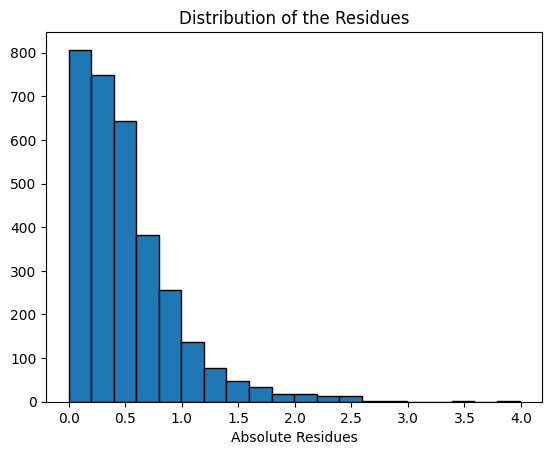

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# winequality-red.csv dataset
data = pd.read_csv("winequality-red.csv", delimiter=';')
X = data.drop('quality', axis=1)
y = np.ravel(data['quality'])

# 80-20 training-test split with a fixed seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

residues = []
num_runs = 10

# average the performance of each MLP Regressor over 10 runs
for seed in range(1, num_runs + 1):
    # Mlp regressor
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10),
                                activation='relu',
                                early_stopping=True,
                                validation_fraction=0.2,
                                random_state=seed)

    mlp_regressor.fit(X_train, y_train)
    y_pred = mlp_regressor.predict(X_test)
    
    # residues = y_test - y_pred
    residues.extend(np.abs(y_test - y_pred))

# Plot the distribution of the residues (in absolute value) using a histogram
plt.hist(residues, bins=20, edgecolor='k')
plt.xlabel('Absolute Residues')
plt.title('Distribution of the Residues')
plt.show()

# 2.
Since we are in the presence of a integer regression task, a recommended trick is to round and bound estimates. Assess the impact of these operations on the MAE of the MLP learnt in previous question.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from warnings import filterwarnings
filterwarnings('ignore')

# winequality-red.csv dataset
data = pd.read_csv("winequality-red.csv", delimiter=';')
X = data.drop('quality', axis=1)
y = np.ravel(data['quality'])

# 80-20 training-test split with a fixed seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mae_original = []
mae_with_round_and_bound = []
num_runs = 10

#bounds
bound1 = 1
bound2 = 10

for seed in range(1, num_runs + 1):
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10),
                                activation='relu',
                                early_stopping=True,
                                validation_fraction=0.2,
                                random_state=seed)

    mlp_regressor.fit(X_train, y_train)
    y_pred = mlp_regressor.predict(X_test)
    

    # MAE without rounding or bounding
    mae_original.append(mean_absolute_error(y_test, y_pred))
    
    # MAE with rounding and bounding
    y_pred_rounded = np.round(y_pred)
    y_pred_round_bound = np.clip(y_pred_rounded, bound1, bound2)
    mae_with_round_and_bound.append(mean_absolute_error(y_test, y_pred_round_bound))

#calculate average MAE
avg_mae = np.mean(mae_original)
avg_mae_round_bound = np.mean(mae_with_round_and_bound)

print(f"MAE: {avg_mae:.6f}")
print(f"MAE with rounding and bounding: {avg_mae_round_bound:.6f}")

MAE: 0.509717
MAE with rounding and bounding: 0.438750


# 3.
Similarly assess the impact on RMSE from replacing early stopping by a well-defined number of iterations in {20,50,100,200} (where one iteration corresponds to a batch).

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from warnings import filterwarnings
filterwarnings('ignore')

# winequality-red.csv dataset
data = pd.read_csv("winequality-red.csv", delimiter=';')
X = data.drop('quality', axis=1)
y = np.ravel(data['quality'])

# 80-20 training-test split with a fixed seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

num_runs = 10
rmse_values = []
iteration_counts = [20, 50, 100, 200]

for num_iterations in iteration_counts:
    rmse_iterations = []

    for seed in range(1, num_runs + 1):
        
        mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10),
                                    activation='relu',
                                    max_iter=num_iterations,
                                    random_state=seed)

        mlp_regressor.fit(X_train, y_train)
        y_pred = mlp_regressor.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test,y_pred))
        rmse_iterations.append(rmse)

    rmse_values.append(np.mean(rmse_iterations))

for i, num_iterations in enumerate(iteration_counts):
    print(f"Average RMSE with {num_iterations} iterations: {rmse_values[i]:.5f}")

Average RMSE with 20 iterations: 1.40398
Average RMSE with 50 iterations: 0.79961
Average RMSE with 100 iterations: 0.69404
Average RMSE with 200 iterations: 0.65545


# 4.
Critically comment the results obtained in previous question, hypothesizing at least one reason why early stopping favors and/or worsens performance.

Analisando os resultados obtidos na questão anterior, podemos observar que a diminuição mais acentuada do RMSE ocorre entre 20 e 50 iterações (diminuição de 0.60437), e diminui de modo algo significativo ainda entre as 50 e 100 iterações (diminuição de 0.10557); entre as 100 e 200 iterações, o RMSE mal diminui (diminuição de 0.03858), indicando que começa a estagnar em torno desse valor (0.65545). 
Podemos então concluir que, com base na diferença entre as 20 e 50 iterações o modelo aqui ainda é passível de melhoria, e mais iterações serão benéficas para melhorar a sua performance, e ainda não se encontra a convergir para uma solução ótima; com base na diferença entre as 50 e 100 iterações, percebemos que a performance do modelo ainda melhorou mas que este começa a convergir, e que apesar de se poderem executar mais iterações, a melhoria será cada vez mais pequena. Finalmente, observando a pequena diferença entre as 100 e 200 iterações, conclui-se que mais iterações dificilmente irão favorecer a performance do modelo, que aparenta estar a convergir. 

Como visto nas teóricas, o early stopping é uma boa técnica para prevenir overfitting do modelo, que no caso de iterações bem definidas aparenta ocorrer a partir das 200; portanto, apresenta-se como melhor alternativa para o caso de iterações bem definidas superiores às 200. Comparando com o RMSE para 50, 100 e 200 iterações bem definidas, este varia entre 0.79961 (50 iterações) e 0.65545 (200 iterações), sendo as iterações bem definidas uma melhor alternativa ao early stopping neste intervalo, que apresenta um RMSE de 0.81888. Finalmente, o early stopping constitui uma melhor atlternativa ao caso de 20 iterações bem definidas (em que o RMSE é 1.40398), onde o modelo aparenta não estar próximo de convergir ainda, com um erro elevado.